In [37]:
import pandas as pd

# Importing the dataset:

In [38]:


    df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv',index_col=0)

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Summary of the dataset:

In [40]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# Impute missing 'Age' values
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Handle missing 'Embarked' values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Handle missing 'Cabin' values
df['Cabin_available'] = df['Cabin'].notnull().astype(int)
df = df.drop('Cabin', axis=1)

# Verify the cleaning
print("\nMissing Values after cleaning:\n", df.isnull().sum())
print("\nDataFrame columns after cleaning:\n", df.columns.values)
display(df.head())


Missing Values after cleaning:
 Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Cabin_available    0
dtype: int64

DataFrame columns after cleaning:
 ['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Embarked' 'Cabin_available']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_available
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


# Creating the histogram and boxplot for numeric features

In [42]:
numerical_column_names = df.select_dtypes(include=['number']).columns

In [43]:
numerical_column_names

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin_available'],
      dtype='object')

In [44]:
numeric_df=df[numerical_column_names]

# Histogram

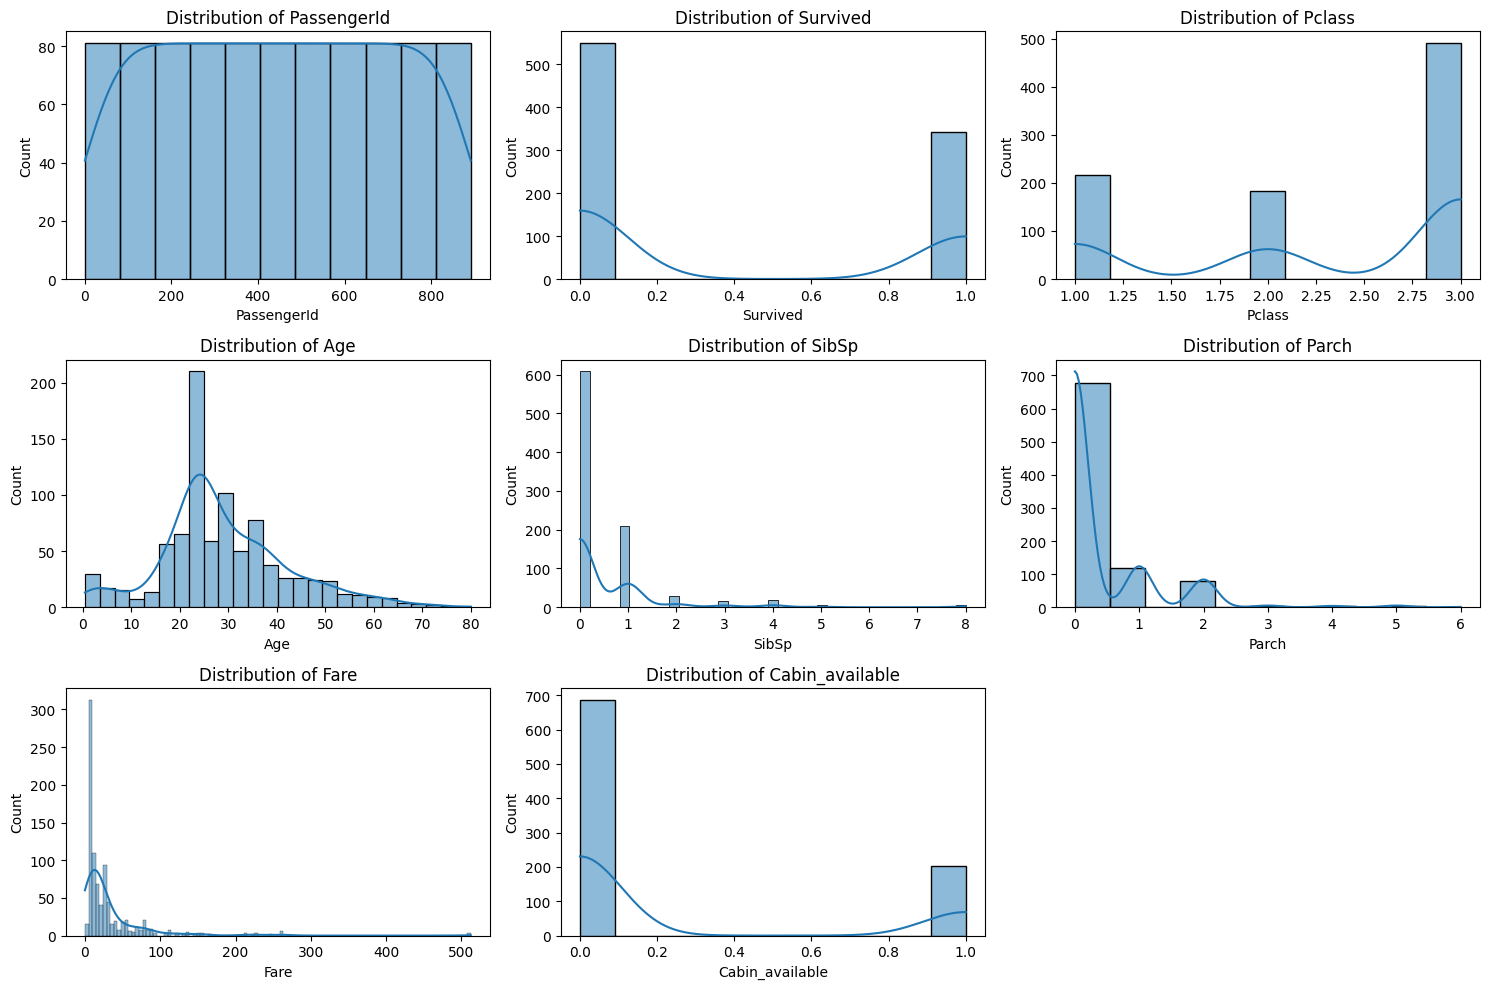

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(numerical_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

plt.show()



# Boxplot

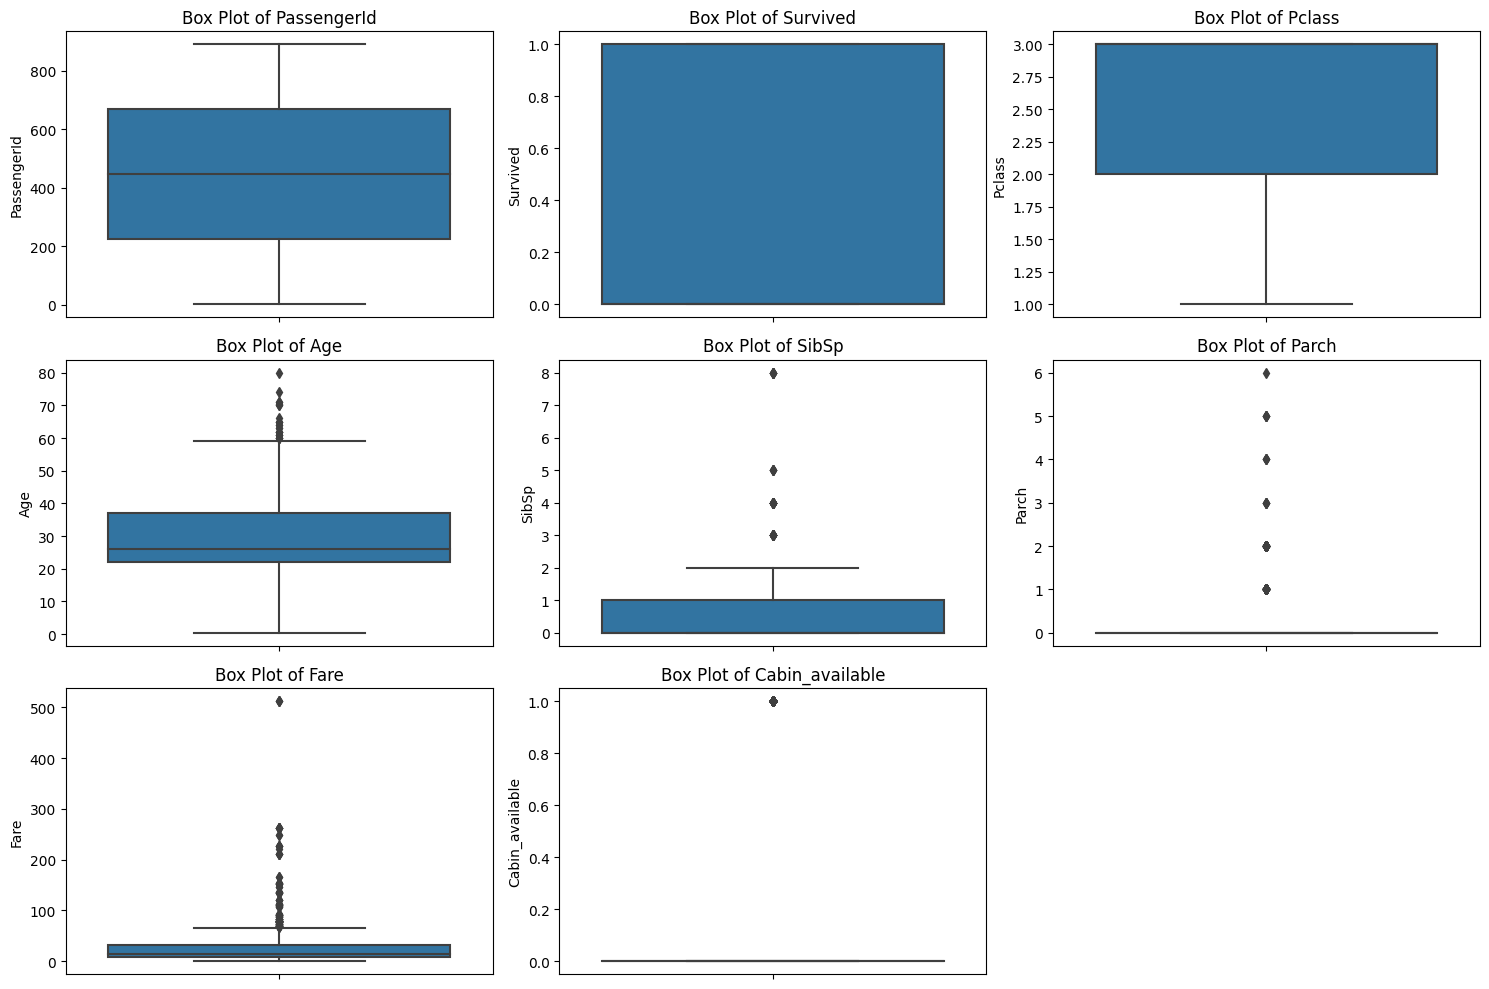

In [46]:
# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=numerical_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

# plotting the pair plot

<Figure size 2000x1200 with 0 Axes>

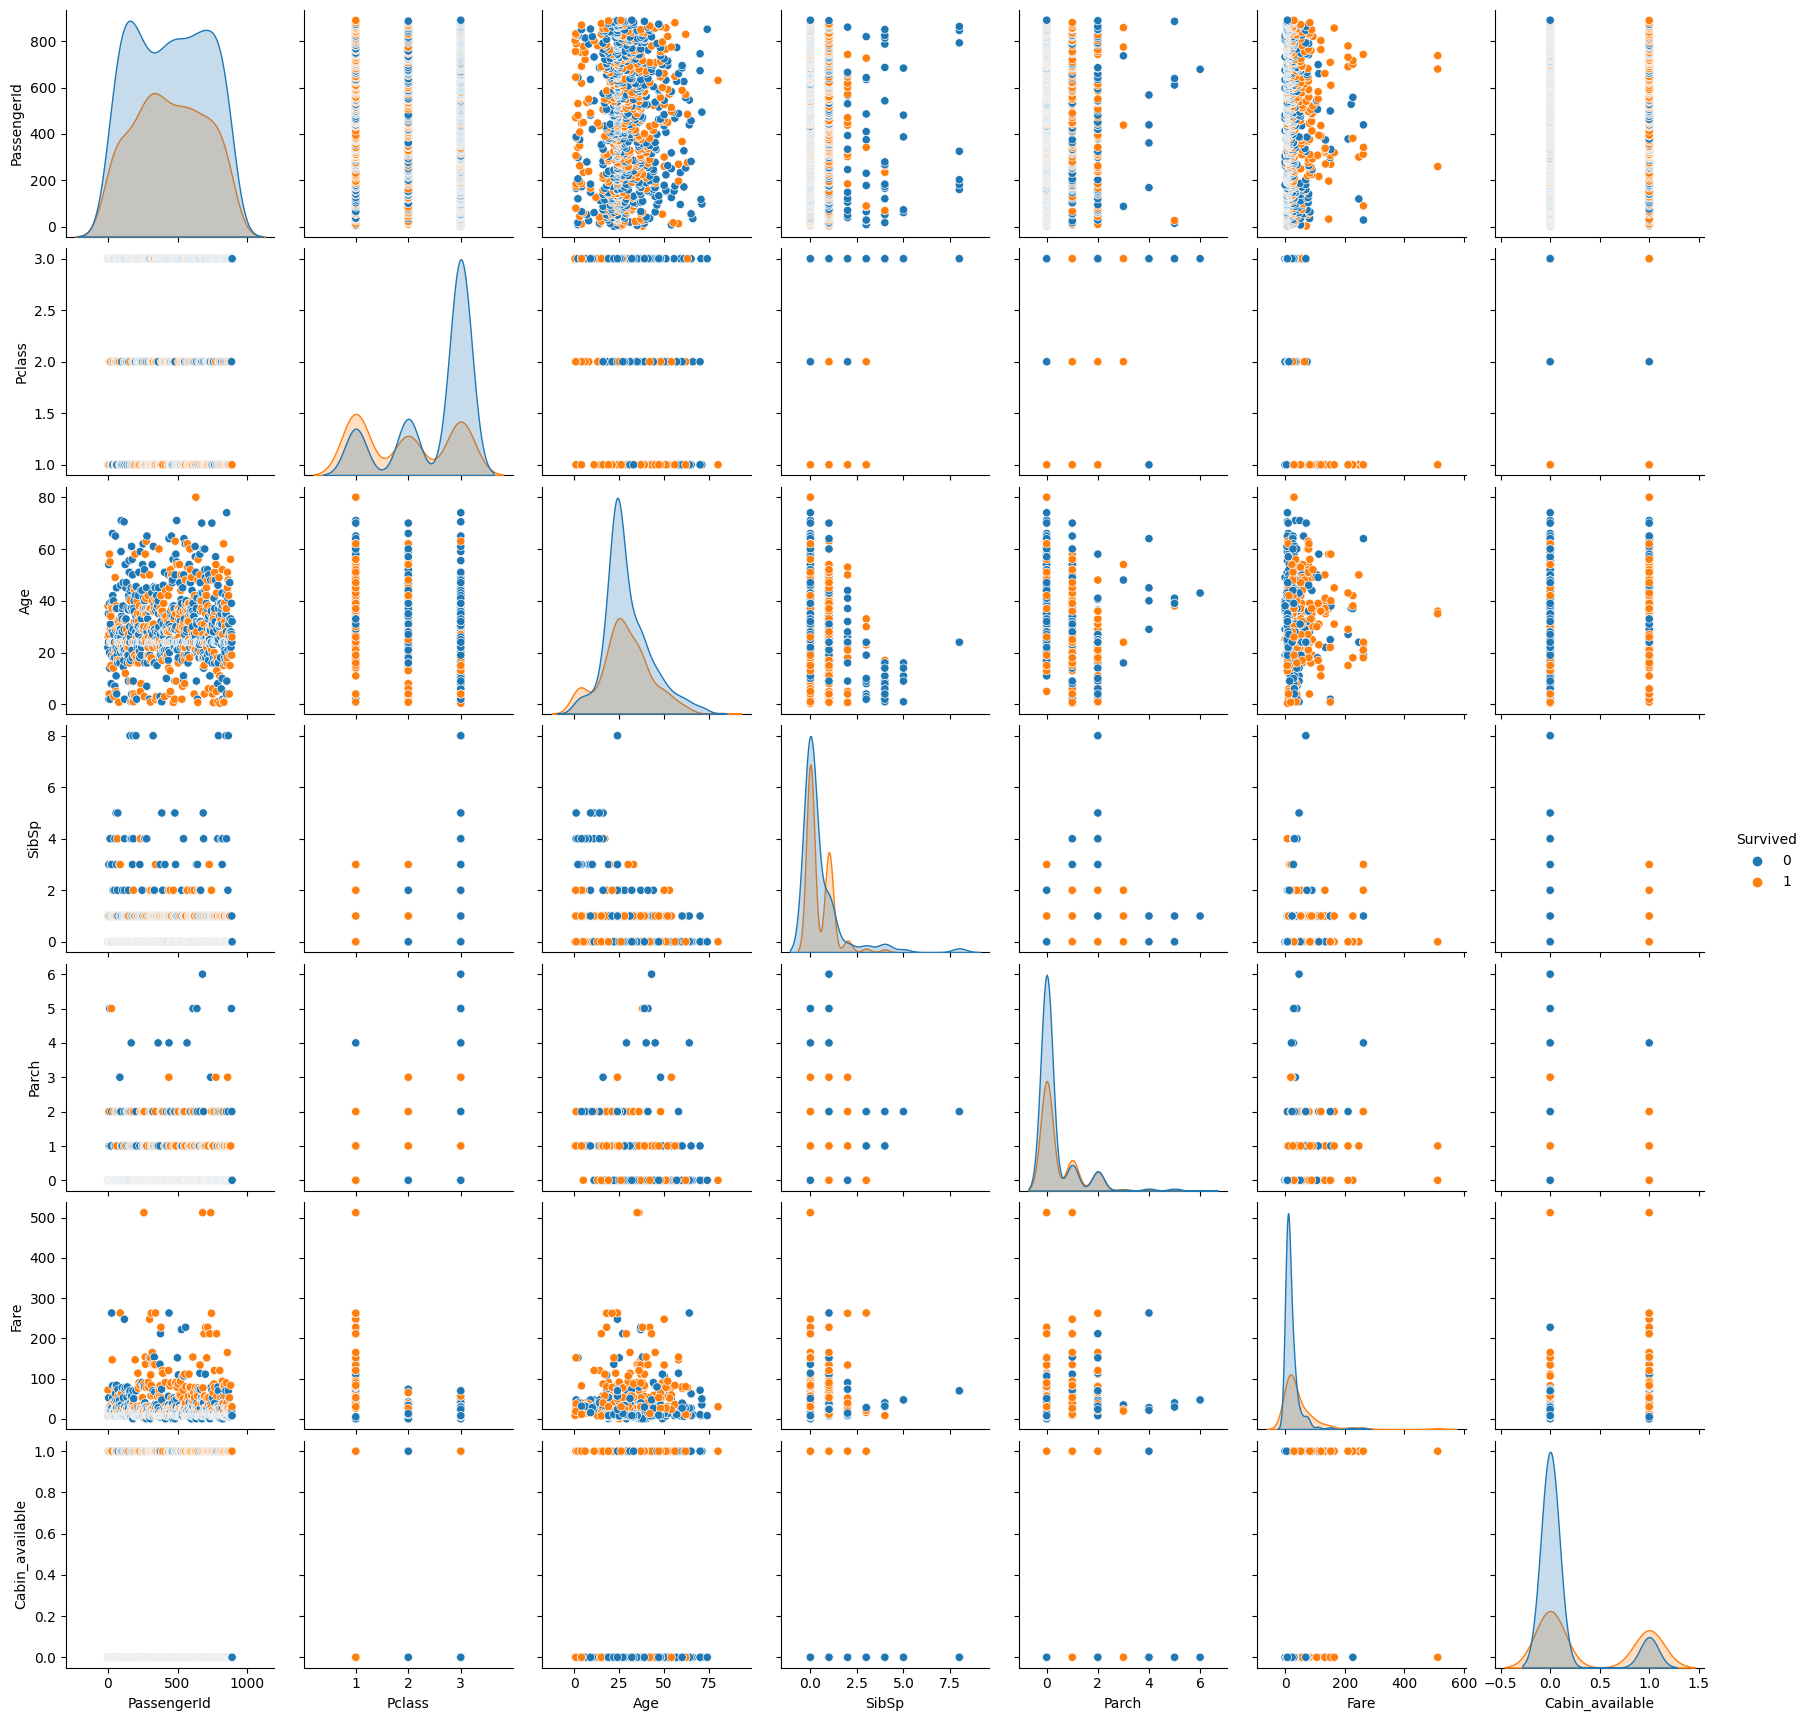

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Pairplot
plt.figure(figsize=(20, 12))
sns.pairplot(numerical_df, hue='Survived', diag_kind='kde')
plt.show()



# Correlation matrix

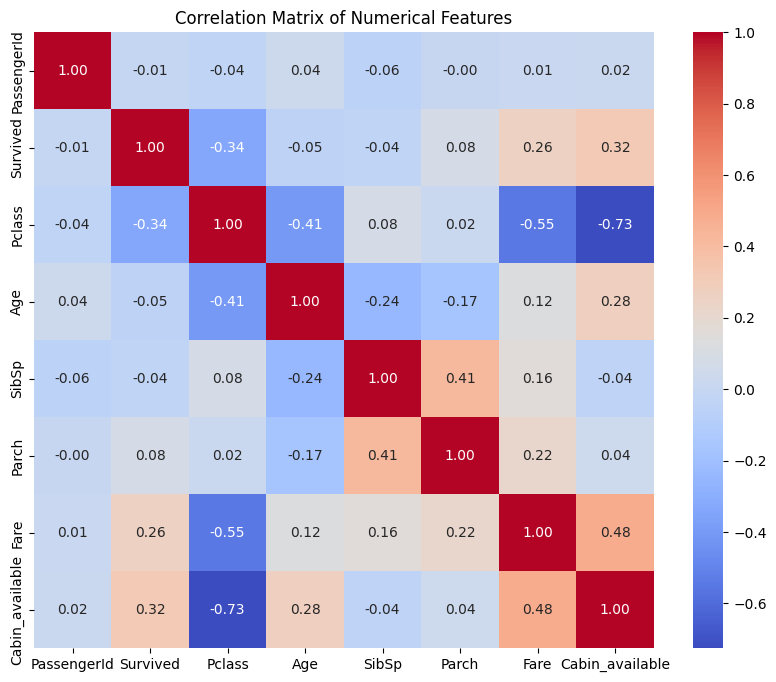

In [48]:
# Correlation matrix
correlation_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')
plt.show()

# Group data by survival status and calculate descriptive statistics for numerical features

In [49]:

survival_stats = df.groupby('Survived')[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_available']].agg(['mean', 'median'])
display(survival_stats)

# Analyze specific features in more detail
print("\nMean Fare for Survivors vs. Non-Survivors:")
print(df.groupby('Survived')['Fare'].mean())

print("\nMean Age for Survivors vs. Non-Survivors:")
print(df.groupby('Survived')['Age'].mean())

print("\nMean Pclass for Survivors vs. Non-Survivors:")
print(df.groupby('Survived')['Pclass'].mean())

print("\nMean Cabin_available for Survivors vs. Non-Survivors:")
print(df.groupby('Survived')['Cabin_available'].mean())

Pclass               Age            SibSp            Parch         \
              mean median       mean median      mean median      mean median   
Survived                                                                        
0         2.531876    3.0  29.560109   25.0  0.553734    0.0  0.329690    0.0   
1         1.950292    2.0  28.273889   27.0  0.473684    0.0  0.464912    0.0   

               Fare        Cabin_available         
               mean median            mean median  
Survived                                           
0         22.117887   10.5        0.123862    0.0  
1         48.395408   26.0        0.397661    0.0


Mean Fare for Survivors vs. Non-Survivors:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Mean Age for Survivors vs. Non-Survivors:
Survived
0    29.560109
1    28.273889
Name: Age, dtype: float64

Mean Pclass for Survivors vs. Non-Survivors:
Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

Mean Cabin_available for Survivors vs. Non-Survivors:
Survived
0    0.123862
1    0.397661
Name: Cabin_available, dtype: float64
